In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm

from sklearn.decomposition import FactorAnalysis

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [4]:
os.chdir('/Users/Weiyang/Desktop/Git/Assignment/Assignment1/Data')

In [5]:
dataset = pd.read_csv('student-mat.csv', delimiter = ';')

### Inspecting Data

In [6]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
dataset.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [9]:
dataset.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

##### Comments:

##### 1) Since there are no unique IDs to identify students, each row shall be assumed as an individual (i.e. 395 students)

##### 2) There are no null values in the dataset

In [11]:
def unique_counts(dataset):
    for i in dataset.columns:
        count = dataset[i].nunique()
        print('There are {} unique values in {}.'.format(count, i))

In [12]:
unique_counts(dataset)

There are 2 unique values in school.
There are 2 unique values in sex.
There are 8 unique values in age.
There are 2 unique values in address.
There are 2 unique values in famsize.
There are 2 unique values in Pstatus.
There are 5 unique values in Medu.
There are 5 unique values in Fedu.
There are 5 unique values in Mjob.
There are 5 unique values in Fjob.
There are 4 unique values in reason.
There are 3 unique values in guardian.
There are 4 unique values in traveltime.
There are 4 unique values in studytime.
There are 4 unique values in failures.
There are 2 unique values in schoolsup.
There are 2 unique values in famsup.
There are 2 unique values in paid.
There are 2 unique values in activities.
There are 2 unique values in nursery.
There are 2 unique values in higher.
There are 2 unique values in internet.
There are 2 unique values in romantic.
There are 5 unique values in famrel.
There are 5 unique values in freetime.
There are 5 unique values in goout.
There are 5 unique values i

### Copy Dataset out

In [13]:
sample_dataset = dataset.copy()

### Data Pre-processing

In [14]:
for i in list(dataset.columns.values):
    
    if dataset[i].dtypes == 'object':
        
        df = pd.get_dummies(dataset[i], prefix=i)
        dataset = pd.concat([dataset, df], axis = 1)
        dataset = dataset.drop(i, axis = 1)

In [15]:
dataset.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


#### For dummies variables:

#### 1) Base reference for school = school_MS (Mousinho)

#### 2) Base reference for sex = sex_M (Male)

#### 3) Base reference for address = address_R (Rural)

#### 4) Base reference for family size = famsize_LE3 (Equal or less than 3)

#### 5) Base reference for parent cohabitation status = Pstatus_A (Apart)

#### 6) Base reference for mother's job = Mjob_teacher (Teacher)

#### 7) Base reference for father's job = Fjob_teacher (Teacher)

#### 8) Base reference for choosing school = reason_other (Others)

#### 9) Base reference for guardian = guardian_other (Others)

In [16]:
dataset.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [17]:
dataset = dataset.drop(['school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_A', 'Mjob_teacher', 'Fjob_teacher' , 'reason_other', 'guardian_other', 'schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_no'], axis = 1)

### Subsetting the Data based on requirements

In [18]:
not_interested = ['G1', 'G2']

In [19]:
interested = [col for col in dataset.columns if col not in not_interested]

In [20]:
interested_dataset = dataset[interested]

#### Plotting grades using Histograms

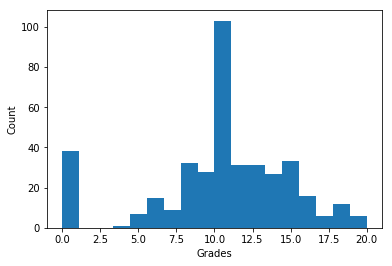

In [21]:
plt.hist(interested_dataset['G3'], bins = 18)
plt.xlabel('Grades')
plt.ylabel('Count')
plt.show()

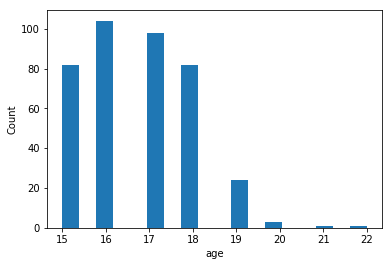

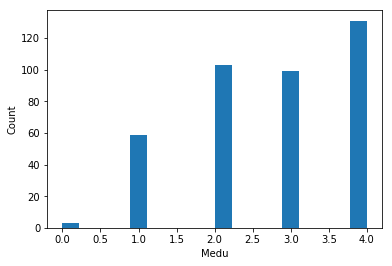

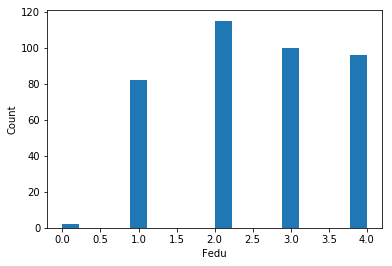

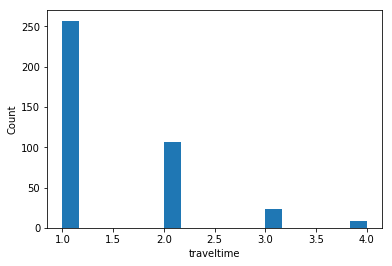

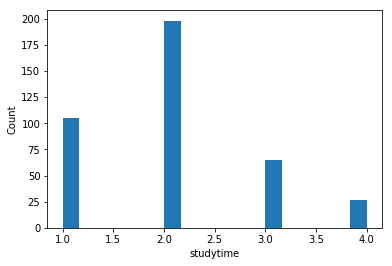

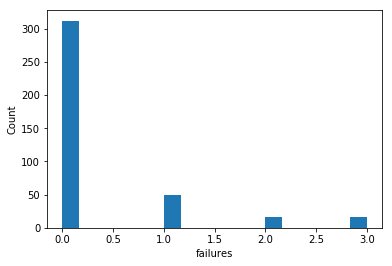

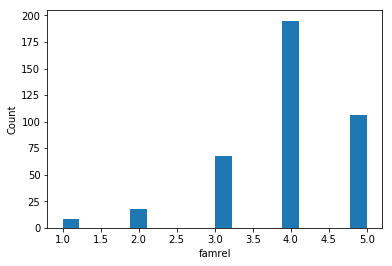

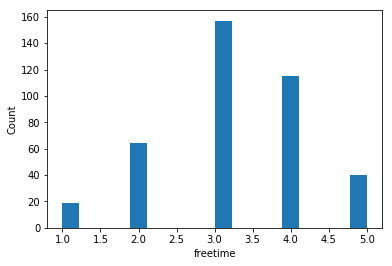

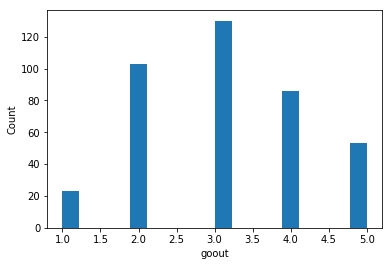

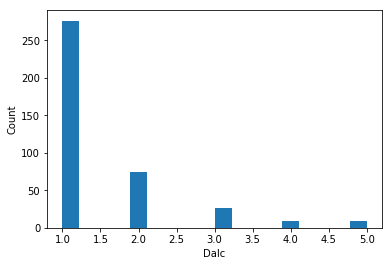

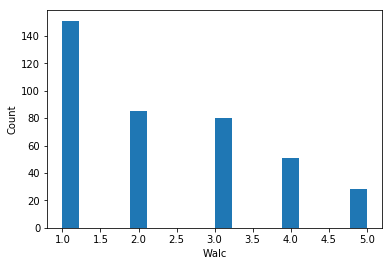

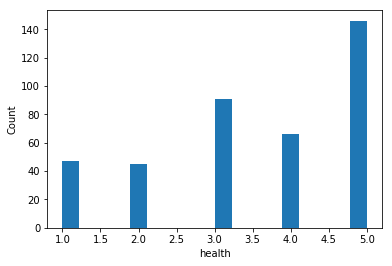

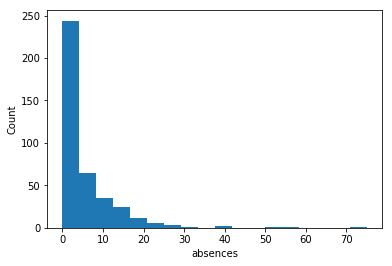

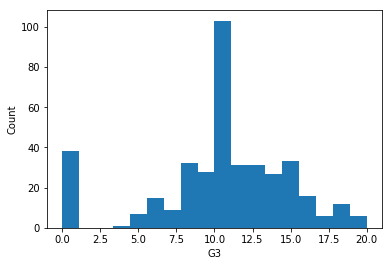

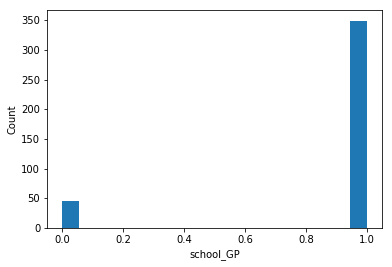

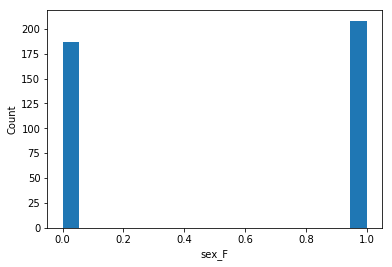

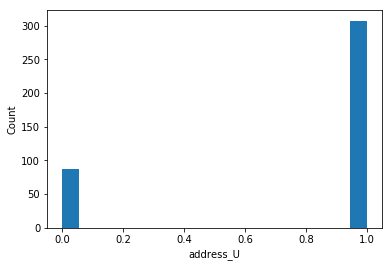

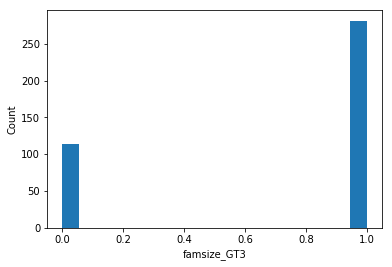

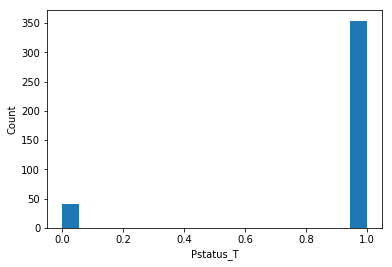

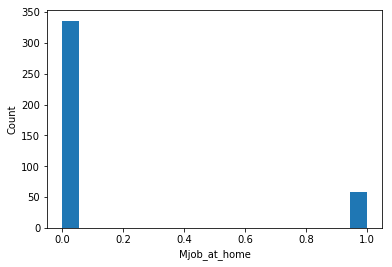

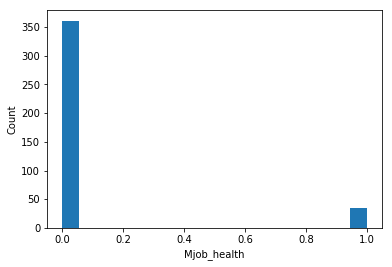

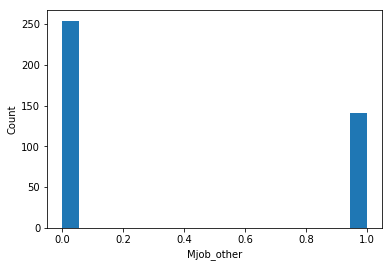

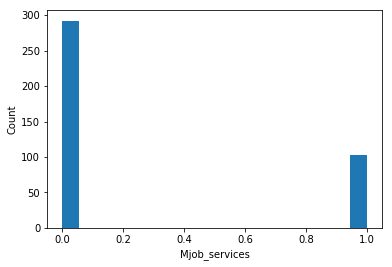

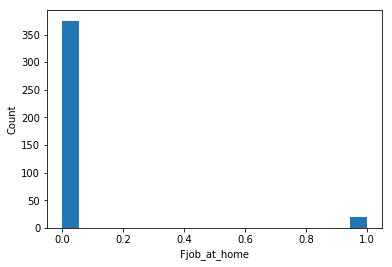

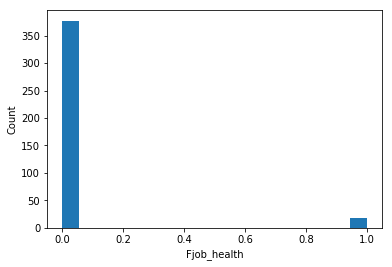

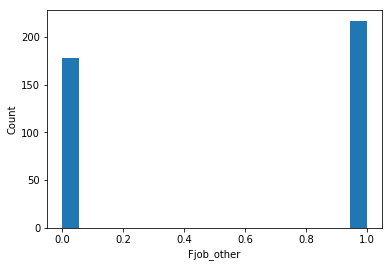

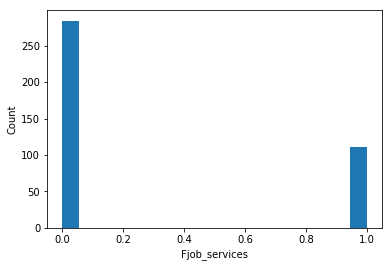

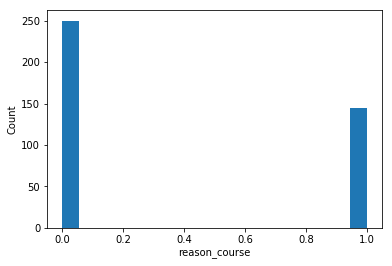

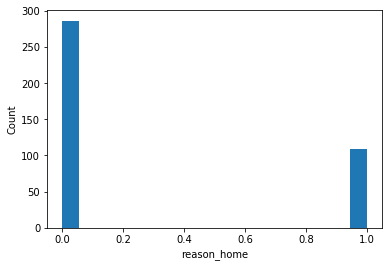

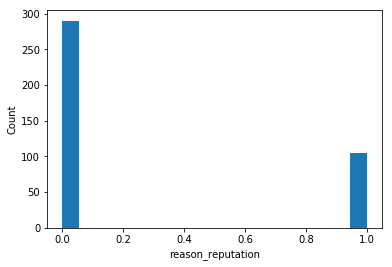

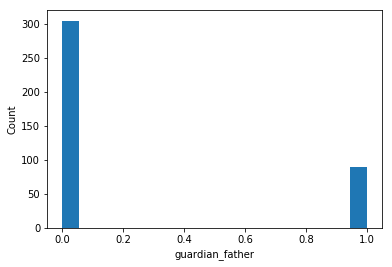

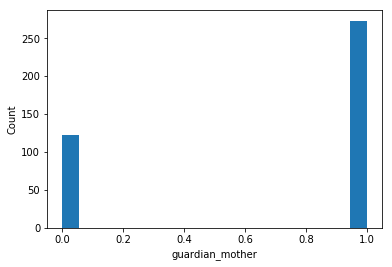

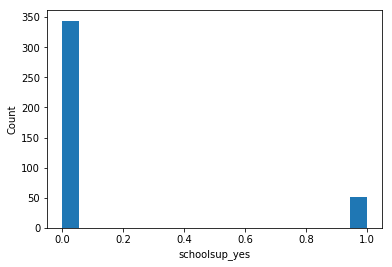

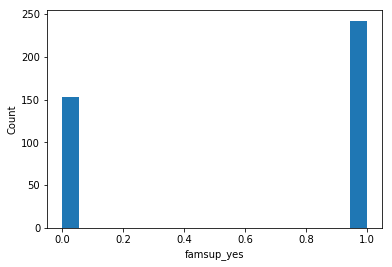

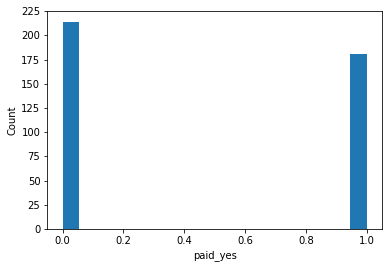

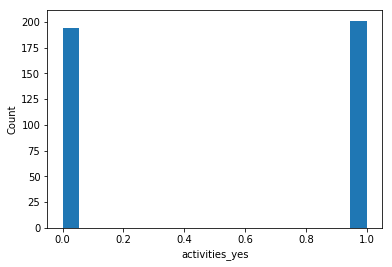

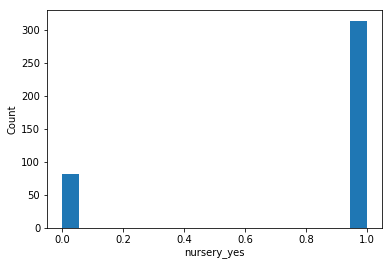

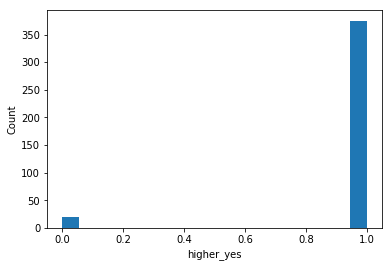

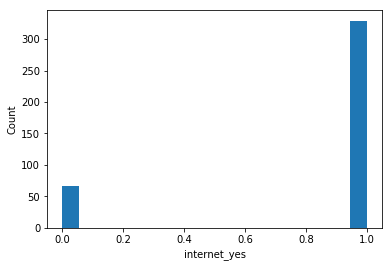

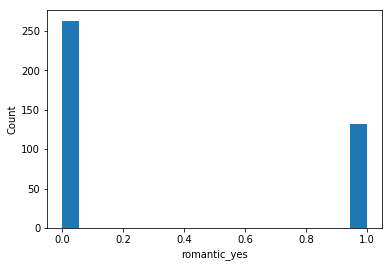

In [22]:
for i in interested_dataset.columns:
    plt.hist(interested_dataset[i], bins = 18)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()   

In [23]:
interested_dataset['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [24]:
interested_dataset['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

##### Comments:

##### 1) There are 38 students who scored 0.

##### 2) The median value is 11 points.

##### 3) The mean value is 10.415 points.

# Performing Linear Regression (using all variables)

In [25]:
labels = 'G3'

y_labels = interested_dataset[labels]

new_list = [i for i in interested_dataset if i != labels]        

data = interested_dataset[new_list]

### Feature Scaling using Min-Max

In [26]:
x = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled,columns=data.columns)

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, y_labels, test_size = 0.33, random_state = 777)

In [28]:
print(x_train.shape)

(264, 39)


In [29]:
print(x_test.shape)

(131, 39)


### Linear Regression using scikit-learn

In [30]:
linreg = LinearRegression(fit_intercept = True, normalize = True)
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Seeing coefficients

In [31]:
print('Estimated Intercept: ', linreg.intercept_)

Estimated Intercept:  14.829601306463568


In [32]:
print('Number of Coefficient: ', len(linreg.coef_))

Number of Coefficient:  39


In [33]:
pd.DataFrame(list(zip(interested_dataset.columns, linreg.coef_)), columns = ['Features', 'Coefficients'])

,Features,Coefficients
0,age,-3.412688
1,Medu,1.850584
2,Fedu,0.318145
3,traveltime,-0.352997
4,studytime,0.969380
5,failures,-4.559917
6,famrel,0.990160
7,freetime,0.236519
8,goout,-1.169254
9,Dalc,-1.738117


In [34]:
predictions = linreg.predict(x_test)

### Evaluating Performance

In [35]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, predictions))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, predictions)))
print('r_2 statistic: %.3f' % r2_score(y_test, predictions))

Mean squared error: 18.01
Mean absolute error: 3.24
Root mean squared error: 4.24
r_2 statistic: 0.142


### Storing Results

In [36]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted':predictions})

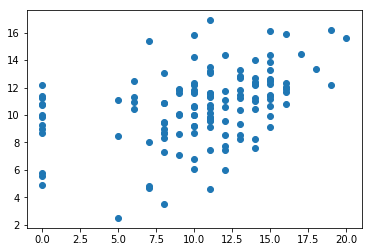

In [37]:
plt.scatter(y_test, predictions)
plt.show()

### Using statsmodel to run linear regression

In [38]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2.201
Date:                Sat, 15 Sep 2018   Prob (F-statistic):           0.000185
Time:                        10:01:10   Log-Likelihood:                -733.08
No. Observations:                 264   AIC:                             1546.
Df Residuals:                     224   BIC:                             1689.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.8296      3.68

### Visualizing Residuals

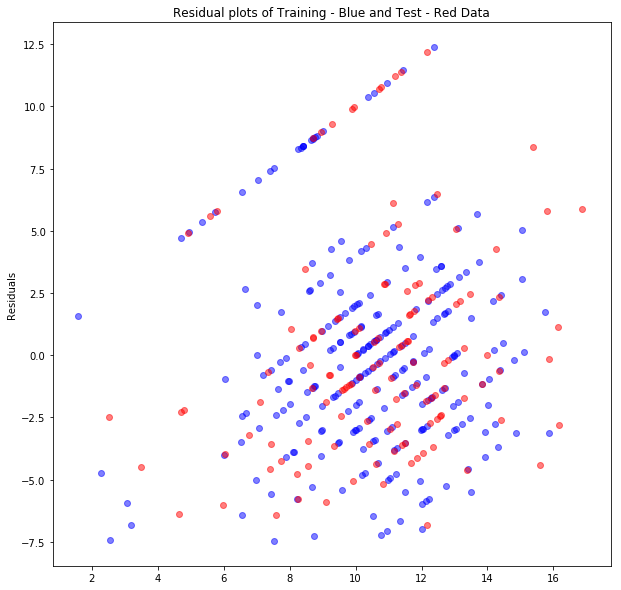

In [39]:
plt.figure(figsize = (10,10))

plt.scatter(linreg.predict(x_train), linreg.predict(x_train) - y_train, c = 'blue', alpha = 0.5)
plt.scatter(linreg.predict(x_test), linreg.predict(x_test) - y_test, c = 'red', alpha = 0.5)
plt.ylabel('Residuals')
plt.title('Residual plots of Training - Blue and Test - Red Data')
plt.show()

## Changing the number of variables

In [40]:
min_features = 1
max_features = 30

r_squared = []
adj_r_squared = []
error_term = []
mean_squared_errors_residuals = []
mean_squared_errors_total = []
aic_train = []
bic_train = []


for features in range(min_features, max_features+1):
    Y = sample_dataset['G3']
    X = sample_dataset.drop(['G1', 'G2', 'G3'], axis = 1)
    X = X.sample(features, axis = 1, random_state = 777)
    X = pd.get_dummies(X)
    min_max_scaler = MinMaxScaler()
    X_scaled = min_max_scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 777)
    results = sm.OLS(Y_train, X_train).fit()
    predictions = results.predict(X_test)
    score = r2_score(Y_test, predictions)
    
    error_term.append(score)
    mean_squared_errors_residuals.append(results.mse_resid)
    mean_squared_errors_total.append(results.mse_total)
    aic_train.append(results.aic)
    bic_train.append(results.bic)
    r_squared.append(results.rsquared)
    adj_r_squared.append(results.rsquared_adj)

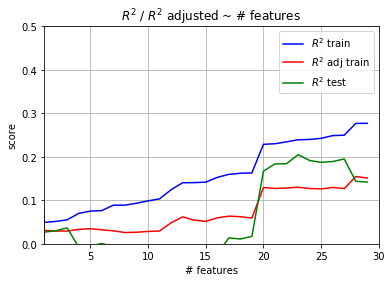

In [41]:
plt.plot(r_squared, color='blue', label='$R^2$ train')
plt.plot(adj_r_squared, color='red', label='$R^2$ adj train')
plt.plot(error_term, color = 'green', label = '$R^2$ test')
plt.title('$R^2$ / $R^2$ adjusted ~ # features')
plt.xlabel('# features')
plt.ylabel('score')
plt.xlim(1,30)
plt.ylim(0, 0.5)
plt.legend()
plt.grid();

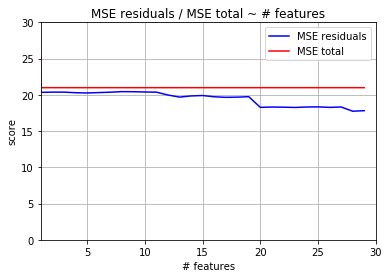

In [42]:
plt.plot(mean_squared_errors_residuals, color='blue', label='MSE residuals')
plt.plot(mean_squared_errors_total, color='red', label='MSE total')
plt.title('MSE residuals / MSE total ~ # features')
plt.xlabel('# features')
plt.ylabel('score')
plt.xlim(1,30)
plt.ylim(0, 30)
plt.legend()
plt.grid();

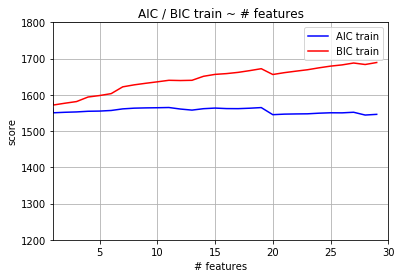

In [43]:
plt.plot(aic_train, color='blue', label='AIC train')
plt.plot(bic_train, color='red', label='BIC train')
plt.title('AIC / BIC train ~ # features')
plt.xlabel('# features')
plt.ylabel('score')
plt.xlim(1,30)
plt.ylim(1200, 1800)
plt.legend()
plt.grid();

## Changing Learning Rates

In [44]:
learning_rates = np.linspace(0,10,1000,endpoint=False)

r_squared_train_lr = []
r_squared_test_lr = []
mean_2_error_lr = []

r_squared_train_lasso = []
r_squared_test_lasso = []
mean_2_error_lasso = []

r_squared_train_ridge = []
r_squared_test_ridge = []
mean_2_error_ridge = []

for learning_rate in learning_rates:
    
    Y = sample_dataset['G3']
    X = sample_dataset.drop(['G1', 'G2', 'G3'], axis = 1)
    X = pd.get_dummies(X)
    min_max_scaler = MinMaxScaler()
    X_scaled = min_max_scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 777)
    
    linear_regression = LinearRegression()
    lasso = Lasso(alpha = learning_rate, random_state = 777, max_iter = 10000)
    ridge = Ridge(alpha = learning_rate, random_state = 777, max_iter = 10000)
    
    linear_regression.fit(X_train, Y_train)
    
    r_squared_train_lr.append(linear_regression.score(X_train, Y_train))
    r_squared_test_lr.append(linear_regression.score(X_test, Y_test))
    mean_2_error_lr.append(mean_squared_error(Y_test, linear_regression.predict(X_test)))
    
    lasso.fit(X_train, Y_train)
    
    r_squared_train_lasso.append(lasso.score(X_train, Y_train))
    r_squared_test_lasso.append(lasso.score(X_test, Y_test))
    mean_2_error_lasso.append(mean_squared_error(Y_test, lasso.predict(X_test)))
    
    ridge.fit(X_train, Y_train)
    
    r_squared_train_ridge.append(ridge.score(X_train, Y_train))
    r_squared_test_ridge.append(ridge.score(X_test, Y_test))
    mean_2_error_ridge.append(mean_squared_error(Y_test, ridge.predict(X_test)))               

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.2051394858153964e-20
  ' condition number: {}'.format(rcond), RuntimeWarn

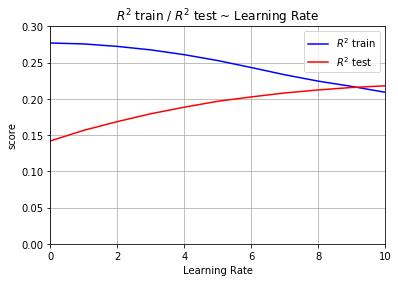

In [45]:
plt.plot(r_squared_train_lasso, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_lasso, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(0,0.3)
plt.legend()
plt.grid();

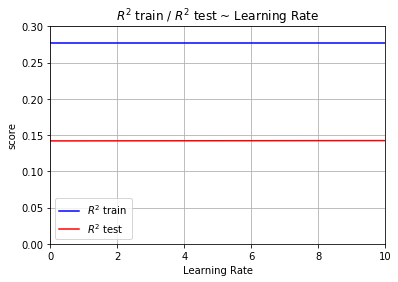

In [46]:
plt.plot(r_squared_train_ridge, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_ridge, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(0,0.3)
plt.legend()
plt.grid();

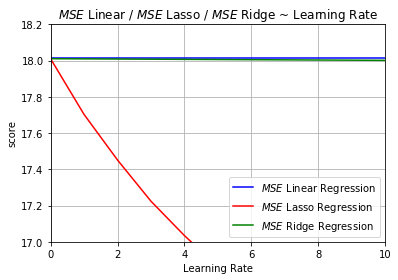

In [47]:
plt.plot(mean_2_error_lr, color='blue', label='$MSE$ Linear Regression')
plt.plot(mean_2_error_lasso, color='red', label='$MSE$ Lasso Regression')
plt.plot(mean_2_error_ridge, color='green', label='$MSE$ Ridge Regression')
plt.title('$MSE$ Linear / $MSE$ Lasso / $MSE$ Ridge ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(17, 18.2)
plt.legend()
plt.grid();

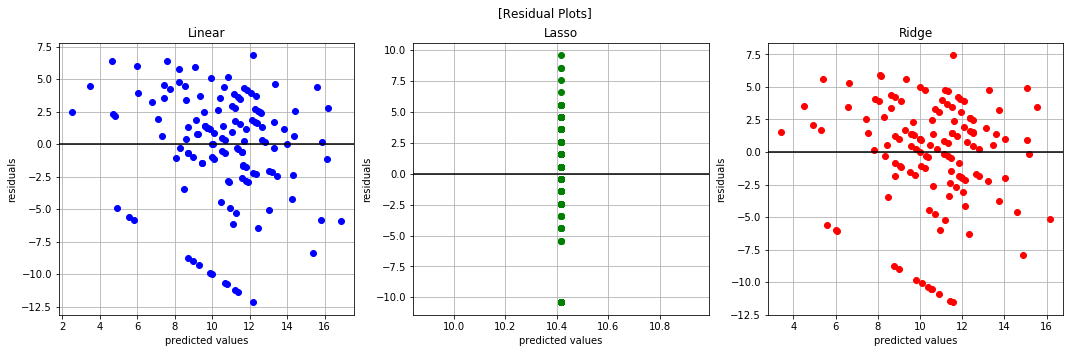

In [48]:
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(18,5)
axes[0].plot(linear_regression.predict(X_test), (Y_test - linear_regression.predict(X_test)), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(lasso.predict(X_test), (Y_test - lasso.predict(X_test)), 'go')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Lasso')
axes[1].set_xlabel('predicted values')
axes[1].set_ylabel('residuals')
axes[2].plot(ridge.predict(X_test), (Y_test - ridge.predict(X_test)), 'ro')
axes[2].axhline(y=0, color='k')
axes[2].grid()
axes[2].set_title('Ridge')
axes[2].set_xlabel('predicted values')
axes[2].set_ylabel('residuals');

### Writing own linear regression function (Single Variate)

In [49]:
cost_history = []
theta_history = []

def linear_regression(x, y, m_current = 0, b_current = 0, epochs = 1000, learning_rate = 0.0001):
    
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    
    N = float(len(y))
    
    for i in range(epochs):
        
        ### Hypothesis Function
        y_current = (m_current*x) + b_current
        
        ### Cost Function - Sum of Squares
        cost = sum([data**2 for data in (y - y_current)])*(1/(N))
        
        ### Gradient Descent
        m_gradient = -(2/(N)) * sum(x * (y - y_current))
        b_gradient = -(2/(N)) * sum(y - y_current)
        
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
        
        theta = np.array([[m_current], [b_current]])
        cost_history.append(cost)
        theta_history.append(theta)
        
        #if i in (14,epochs):
        #    plt.plot(x, m_current*x + b_current)
        #    plt.suptitle('Linear Regression by gradient descent')
        #    plt.xlabel('x')
        #    plt.ylabel('y')
        #    plt.show()
        
        if i in range(1,epochs,50):
            plt.plot(x, m_current*x + b_current)
            plt.suptitle('Linear Regression by Gradient Descent')
            plt.xlabel('Age')
            plt.ylabel('G3')
            
    return m_current, b_current, cost

(0.4128580919433818, 1.878936352745626, 92.30411950107678)

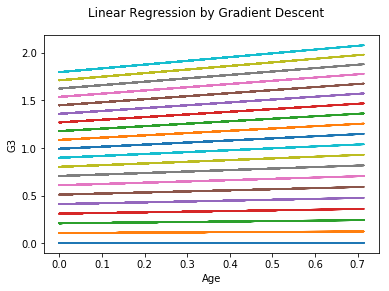

In [50]:
linear_regression(x_train['age'], y_train)

## Randomly Selecting 10 parameters

In [51]:
y_sample = sample_dataset['G3']
sample_set = sample_dataset.drop(['G1', 'G2', 'G3'], axis = 1)
sample_10 = sample_set.sample(10,axis=1, random_state = 777)
sample_10_dummies = pd.get_dummies(sample_10)

### Setting Reference Level for dummy variable interpretation

In [52]:
sample_10_dummies = sample_10_dummies.drop(['Mjob_teacher', 'famsup_no', 'reason_home', 'address_R', 'Fjob_teacher', 'nursery_no'], axis = 1)

In [53]:
sample_10_dummies_values = sample_10_dummies.values
min_max_scaler = MinMaxScaler()
sample_10_dummies_scaled = min_max_scaler.fit_transform(sample_10_dummies_values)
sample_10_dummies_scaled = pd.DataFrame(sample_10_dummies_scaled,columns=sample_10_dummies.columns)

x_train, x_test, y_train, y_test = train_test_split(sample_10_dummies_scaled, y_sample, test_size = 0.33, random_state = 777)

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Linear Regression using Stats Model

In [54]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.399
Date:                Sat, 15 Sep 2018   Prob (F-statistic):              0.132
Time:                        10:01:43   Log-Likelihood:                -762.99
No. Observations:                 264   AIC:                             1564.
Df Residuals:                     245   BIC:                             1632.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.3602      1.87

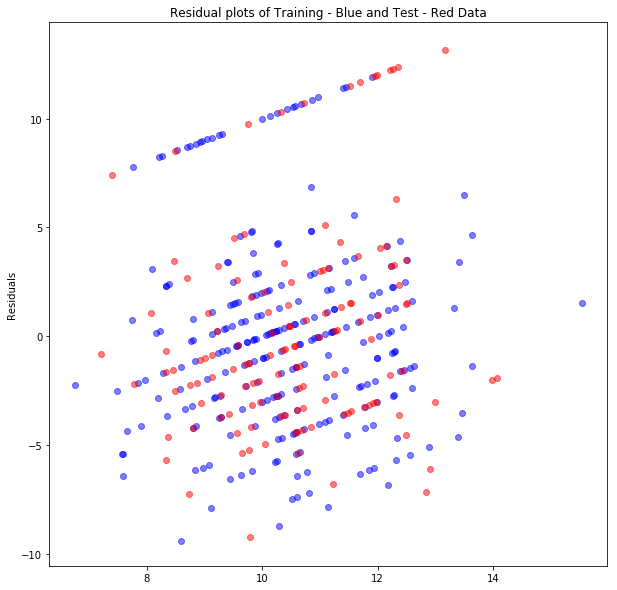

In [55]:
linreg = LinearRegression(fit_intercept=True, normalize=True)
linreg.fit(x_train, y_train)

plt.figure(figsize = (10,10))

plt.scatter(linreg.predict(x_train), linreg.predict(x_train) - y_train, c = 'blue', alpha = 0.5)
plt.scatter(linreg.predict(x_test), linreg.predict(x_test) - y_test, c = 'red', alpha = 0.5)
plt.ylabel('Residuals')
plt.title('Residual plots of Training - Blue and Test - Red Data')
plt.show()

In [56]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, linreg.predict(x_test)))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, linreg.predict(x_test)))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, linreg.predict(x_test))))
print('r_2 statistic: %.3f' % r2_score(y_test, linreg.predict(x_test)))

Mean squared error: 21.74
Mean absolute error: 3.54
Root mean squared error: 4.66
r_2 statistic: -0.036


### Linear/Lasso/Ridge regression using scikit-learn to change learning rates

In [57]:
learning_rates = np.linspace(0,10,1000,endpoint=False)

r_squared_train_lr = []
r_squared_test_lr = []
mean_2_error_lr = []

r_squared_train_lasso = []
r_squared_test_lasso = []
mean_2_error_lasso = []

r_squared_train_ridge = []
r_squared_test_ridge = []
mean_2_error_ridge = []

for learning_rate in learning_rates:
    
    linear_regression = LinearRegression()
    lasso = Lasso(alpha = learning_rate, random_state = 777, max_iter = 10000)
    ridge = Ridge(alpha = learning_rate, random_state = 777, max_iter = 10000)
    
    linear_regression.fit(x_train, y_train)
    
    r_squared_train_lr.append(linear_regression.score(x_train, y_train))
    r_squared_test_lr.append(linear_regression.score(x_test, y_test))
    mean_2_error_lr.append(mean_squared_error(y_test, linear_regression.predict(x_test)))
    
    lasso.fit(x_train, y_train)
    
    r_squared_train_lasso.append(lasso.score(x_train, y_train))
    r_squared_test_lasso.append(lasso.score(x_test, y_test))
    mean_2_error_lasso.append(mean_squared_error(y_test, lasso.predict(x_test)))
    
    ridge.fit(x_train, y_train)
    
    r_squared_train_ridge.append(ridge.score(x_train, y_train))
    r_squared_test_ridge.append(ridge.score(x_test, y_test))
    mean_2_error_ridge.append(mean_squared_error(y_test, ridge.predict(x_test)))               

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


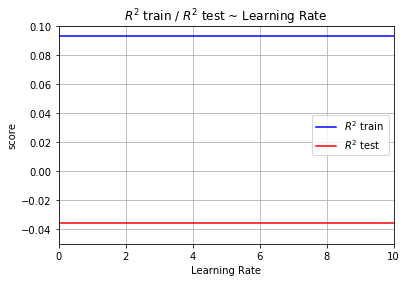

In [58]:
plt.plot(r_squared_train_lr, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_lr, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(-0.05,0.1)
plt.legend()
plt.grid();

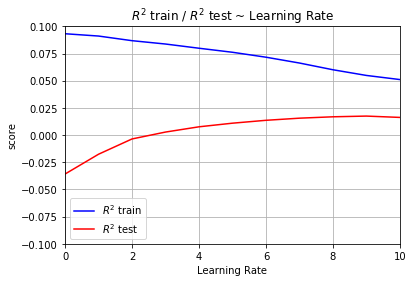

In [59]:
plt.plot(r_squared_train_lasso, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_lasso, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(-0.1,0.1)
plt.legend()
plt.grid();

Note that it is possible to get a negative R-square for equations that do not contain a constant term. Because R-square is defined as the proportion of variance explained by the fit, if the fit is actually worse than just fitting a horizontal line then R-square is negative.

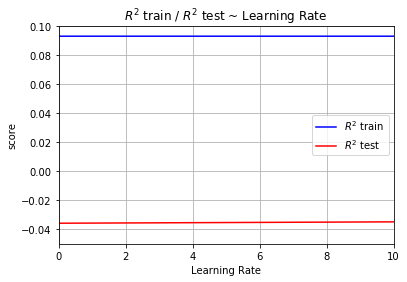

In [60]:
plt.plot(r_squared_train_ridge, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_ridge, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(-0.05,0.1)
plt.legend()
plt.grid();

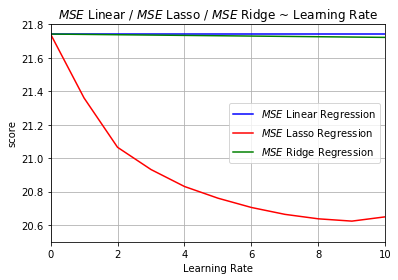

In [61]:
plt.plot(mean_2_error_lr, color='blue', label='$MSE$ Linear Regression')
plt.plot(mean_2_error_lasso, color='red', label='$MSE$ Lasso Regression')
plt.plot(mean_2_error_ridge, color='green', label='$MSE$ Ridge Regression')
plt.title('$MSE$ Linear / $MSE$ Lasso / $MSE$ Ridge ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(20.5, 21.8)
plt.legend()
plt.grid();

## Self Selecting 10 parameters

In [62]:
y_chosen = sample_dataset['G3']
chosen_set = sample_dataset.drop(['G1', 'G2', 'G3'], axis = 1)

chosen_10 = sample_dataset.loc[:,['traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'health', 'absences', 'school']]
chosen_10_dummies = pd.get_dummies(chosen_10)

In [63]:
chosen_10_dummies.head()

,traveltime,studytime,failures,health,absences,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,higher_no,higher_yes,school_GP,school_MS
0,2,2,0,3,6,0,1,1,0,1,0,0,1,1,0
1,1,2,0,3,4,1,0,0,1,1,0,0,1,1,0
2,1,2,3,3,10,0,1,1,0,0,1,0,1,1,0
3,1,3,0,5,2,1,0,0,1,0,1,0,1,1,0
4,1,2,0,5,4,1,0,0,1,0,1,0,1,1,0


### Setting Reference Level for dummy variable interpretation

In [64]:
chosen_10_dummies = chosen_10_dummies.drop(['schoolsup_no', 'famsup_no', 'paid_no', 'higher_no', 'school_MS'], axis = 1)

In [65]:
chosen_10_dummies_values = chosen_10_dummies.values
min_max_scaler = MinMaxScaler()
chosen_10_dummies_scaled = min_max_scaler.fit_transform(chosen_10_dummies_values)
chosen_10_dummies_scaled = pd.DataFrame(chosen_10_dummies_scaled,columns=chosen_10_dummies.columns)

x_train, x_test, y_train, y_test = train_test_split(chosen_10_dummies_scaled, y_chosen, test_size = 0.33, random_state = 777)

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Linear Regression using Stats Model

In [66]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.105
Date:                Sat, 15 Sep 2018   Prob (F-statistic):           2.94e-05
Time:                        10:01:51   Log-Likelihood:                -756.06
No. Observations:                 264   AIC:                             1534.
Df Residuals:                     253   BIC:                             1573.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9153      1.707      5.221

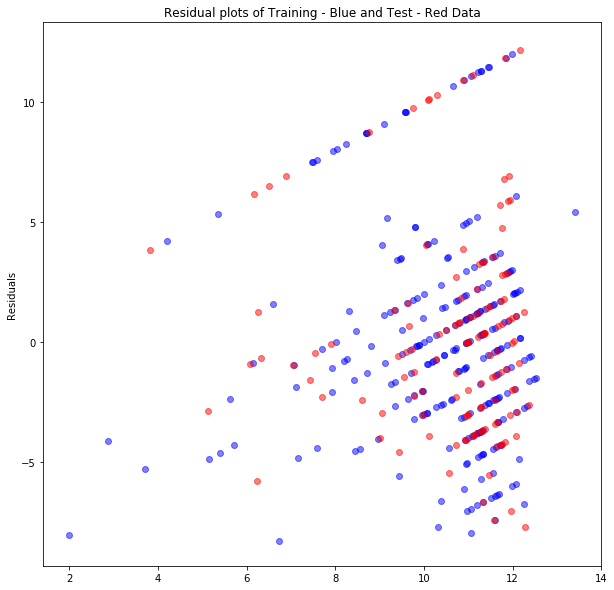

In [67]:
linreg = LinearRegression(fit_intercept=True, normalize=True)
linreg.fit(x_train, y_train)

plt.figure(figsize = (10,10))

plt.scatter(linreg.predict(x_train), linreg.predict(x_train) - y_train, c = 'blue', alpha = 0.5)
plt.scatter(linreg.predict(x_test), linreg.predict(x_test) - y_test, c = 'red', alpha = 0.5)
plt.ylabel('Residuals')
plt.title('Residual plots of Training - Blue and Test - Red Data')
plt.show()

In [68]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, linreg.predict(x_test)))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, linreg.predict(x_test)))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, linreg.predict(x_test))))
print('r_2 statistic: %.3f' % r2_score(y_test, linreg.predict(x_test)))

Mean squared error: 17.39
Mean absolute error: 3.11
Root mean squared error: 4.17
r_2 statistic: 0.172


### Linear/Lasso/Ridge regression using scikit-learn to change learning rates

In [69]:
learning_rates = np.linspace(0,10,1000,endpoint=False)

r_squared_train_lr = []
r_squared_test_lr = []
mean_2_error_lr = []

r_squared_train_lasso = []
r_squared_test_lasso = []
mean_2_error_lasso = []

r_squared_train_ridge = []
r_squared_test_ridge = []
mean_2_error_ridge = []

for learning_rate in learning_rates:
    
    linear_regression = LinearRegression()
    lasso = Lasso(alpha = learning_rate, random_state = 777, max_iter = 10000)
    ridge = Ridge(alpha = learning_rate, random_state = 777, max_iter = 10000)
    
    linear_regression.fit(x_train, y_train)
    
    r_squared_train_lr.append(linear_regression.score(x_train, y_train))
    r_squared_test_lr.append(linear_regression.score(x_test, y_test))
    mean_2_error_lr.append(mean_squared_error(y_test, linear_regression.predict(x_test)))
    
    lasso.fit(x_train, y_train)
    
    r_squared_train_lasso.append(lasso.score(x_train, y_train))
    r_squared_test_lasso.append(lasso.score(x_test, y_test))
    mean_2_error_lasso.append(mean_squared_error(y_test, lasso.predict(x_test)))
    
    ridge.fit(x_train, y_train)
    
    r_squared_train_ridge.append(ridge.score(x_train, y_train))
    r_squared_test_ridge.append(ridge.score(x_test, y_test))
    mean_2_error_ridge.append(mean_squared_error(y_test, ridge.predict(x_test)))               

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


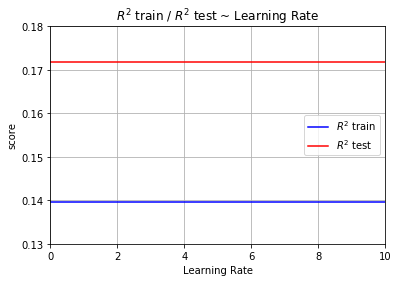

In [70]:
plt.plot(r_squared_train_lr, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_lr, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(0.13,0.18)
plt.legend()
plt.grid();

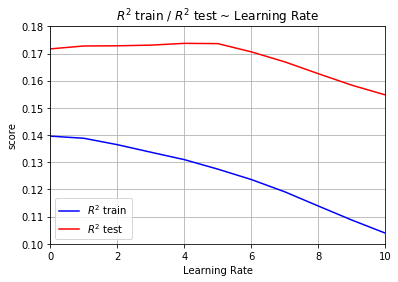

In [71]:
plt.plot(r_squared_train_lasso, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_lasso, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(0.1,0.18)
plt.legend()
plt.grid();

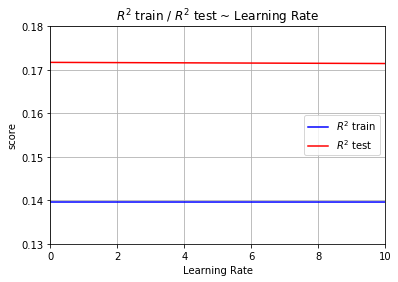

In [72]:
plt.plot(r_squared_train_ridge, color='blue', label='$R^2$ train')
plt.plot(r_squared_test_ridge, color='red', label='$R^2$ test')
plt.title('$R^2$ train / $R^2$ test ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(0.13,0.18)
plt.legend()
plt.grid();

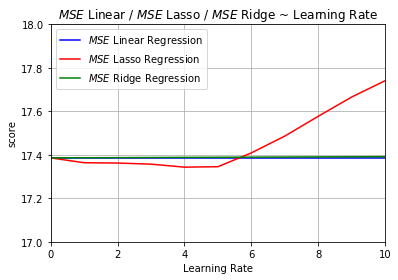

In [73]:
plt.plot(mean_2_error_lr, color='blue', label='$MSE$ Linear Regression')
plt.plot(mean_2_error_lasso, color='red', label='$MSE$ Lasso Regression')
plt.plot(mean_2_error_ridge, color='green', label='$MSE$ Ridge Regression')
plt.title('$MSE$ Linear / $MSE$ Lasso / $MSE$ Ridge ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('score')
plt.xlim(0,10)
plt.ylim(17, 18)
plt.legend()
plt.grid();

## Logistics Regression